In [48]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import cv2 
import os

In [49]:
path = str(os.path.abspath("../Datasets/images"))
path

'd:\\TEST\\Python\\Deep Learning\\Datasets\\images'

In [50]:
img = cv2.imread(r"../Datasets\images\elon musk\download (1).jpg")
img.shape


(194, 259, 3)

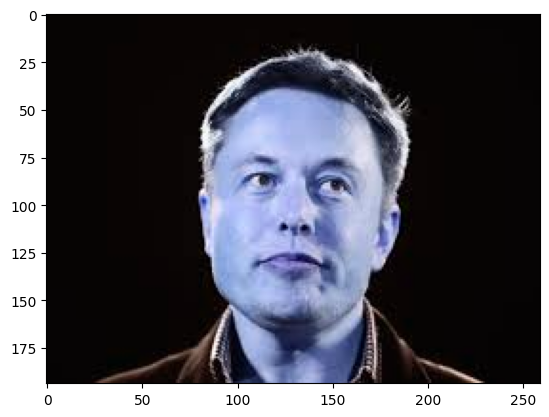

In [51]:
plt.imshow(img)

In [52]:
celebrity_file_names_dict = {}
for folder in os.listdir(path):
    print(f"Folder: {folder}")
    folder_path = os.path.join(path, folder)
    celebrity_file_names_dict[folder] = []
    
    # Check if it is actually a directory
    if os.path.isdir(folder_path):
        for image in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image)
            celebrity_file_names_dict[folder].append(image_path)

Folder: elon musk
Folder: maria sharapova
Folder: messi
Folder: ronaldo
Folder: virat


In [53]:
celebrity_file_names_dict

{'elon musk': ['d:\\TEST\\Python\\Deep Learning\\Datasets\\images\\elon musk\\download (1).jpg',
  'd:\\TEST\\Python\\Deep Learning\\Datasets\\images\\elon musk\\download (10).jpg',
  'd:\\TEST\\Python\\Deep Learning\\Datasets\\images\\elon musk\\download (11).jpg',
  'd:\\TEST\\Python\\Deep Learning\\Datasets\\images\\elon musk\\download (12).jpg',
  'd:\\TEST\\Python\\Deep Learning\\Datasets\\images\\elon musk\\download (13).jpg',
  'd:\\TEST\\Python\\Deep Learning\\Datasets\\images\\elon musk\\download (14).jpg',
  'd:\\TEST\\Python\\Deep Learning\\Datasets\\images\\elon musk\\download (15).jpg',
  'd:\\TEST\\Python\\Deep Learning\\Datasets\\images\\elon musk\\download (16).jpg',
  'd:\\TEST\\Python\\Deep Learning\\Datasets\\images\\elon musk\\download (17).jpg',
  'd:\\TEST\\Python\\Deep Learning\\Datasets\\images\\elon musk\\download (2).jpg',
  'd:\\TEST\\Python\\Deep Learning\\Datasets\\images\\elon musk\\download (3).jpg',
  'd:\\TEST\\Python\\Deep Learning\\Datasets\\images\\e

In [54]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1

class_dict

{'elon musk': 0, 'maria sharapova': 1, 'messi': 2, 'ronaldo': 3, 'virat': 4}

In [56]:
X = []
y = []

for celebrity_name, file_list in celebrity_file_names_dict.items():
    for file in file_list:
        img = cv2.imread(file)
        if img is None:
            continue
        img = cv2.resize(img, (32, 32))
        X.append(img)
        y.append(class_dict[celebrity_name])

X = np.array(X).astype('float32') / 255.0
y = np.array(y)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Convert to categorical
from tensorflow.keras.utils import to_categorical
num_classes = len(class_dict)
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)


In [57]:
len(X), len(y)

(349, 349)

In [58]:
len(X[0])

32

In [59]:
32*32*3

3072

In [60]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train_cat.shape)
print("Labels:", np.unique(y_train))


X_train shape: (279, 32, 32, 3)
y_train shape: (279, 5)
Labels: [0 1 2 3 4]


In [61]:
class_dict

{'elon musk': 0, 'maria sharapova': 1, 'messi': 2, 'ronaldo': 3, 'virat': 4}

In [62]:
np.argmax(X_train),np.argmin(X_train)

(9300, 3121)

In [63]:
X_train.shape

(279, 32, 32, 3)

In [64]:
name_nums = np.unique(y_train)

In [65]:
names_dict = {v:k for k,v in class_dict.items()}
names_dict


{0: 'elon musk', 1: 'maria sharapova', 2: 'messi', 3: 'ronaldo', 4: 'virat'}

In [115]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(400, activation='relu'),
    keras.layers.Dropout(0.3),  # Drop 30% neurons
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(num_classes, activation='softmax')
])


c:\Users\Nabeel\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [130]:
model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [131]:
model.fit(
    X_train, y_train_cat,
    epochs=30,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)]
)


Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.9741 - loss: 0.0957 - val_accuracy: 0.9821 - val_loss: 0.0434
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9692 - loss: 0.0851 - val_accuracy: 0.9821 - val_loss: 0.0385
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9844 - loss: 0.0888 - val_accuracy: 0.9821 - val_loss: 0.0324
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9441 - loss: 0.1078 - val_accuracy: 0.9821 - val_loss: 0.0328
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9645 - loss: 0.0961 - val_accuracy: 0.9821 - val_loss: 0.0323
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9817 - loss: 0.0590 - val_accuracy: 0.9821 - val_loss: 0.0353
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9652 - loss: 0.0871 - val_accuracy: 0.9821 - val_loss: 0.0320
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9849 - loss: 0.0685 - val_accuracy: 0.9821 - val_loss: 0.0407


In [132]:
model.evaluate(X_test,y_test_cat)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4584 - loss: 2.3019


[2.1207926273345947, 0.4714285731315613]

In [133]:
predictions = model.predict(X_test)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


In [134]:
test_img = cv2.imread(r"C:\Users\Nabeel\Downloads\download.jpeg")
test_img = cv2.resize(test_img, (32, 32))
test_img_scaled = test_img / 255

test_img_input = np.expand_dims(test_img_scaled, axis=0)  # Shape: (1, 32, 32, 3)

prediction = model.predict(test_img_input)
predicted_class_index = np.argmax(prediction[0])
predicted_class_name = names_dict[predicted_class_index]

print(f"Predicted Class Index: {predicted_class_index}")
print(f"Predicted Celebrity: {predicted_class_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
Predicted Class Index: 2
Predicted Celebrity: messi


Sample image shape: (194, 259, 3)


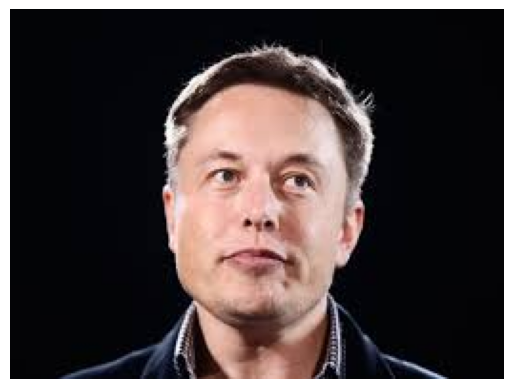

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.1866 - loss: 1.9178 - val_accuracy: 0.2500 - val_loss: 1.6123
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.2563 - loss: 1.7829 - val_accuracy: 0.1429 - val_loss: 1.7328
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.2379 - loss: 1.7677 - val_accuracy: 0.2857 - val_loss: 1.5750
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.3102 - loss: 1.5809 - val_accuracy: 0.2143 - val_loss: 1.5312
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.3102 - loss: 1.5454 - val_accuracy: 0.3929 - val_loss: 1.5730
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.3837 - loss: 1.4679 - val_accuracy: 0.4286 - val_loss: 1.5300
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.3772 - loss: 1.4223 - val_accuracy: 0.3571 - val_loss: 1.4300
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.4020 - loss: 1.4059 - val_accuracy: 0.4286 - val_loss

In [156]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

# Step 1: Load Dataset
path = os.path.abspath("../Datasets/images")

# Step 2: Display a sample image
img = cv2.imread(r"../Datasets/images/elon musk/download (1).jpg")
print("Sample image shape:", img.shape)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Step 3: Organize dataset into a dictionary
celebrity_file_names_dict = {}
for folder in os.listdir(path):
    folder_path = os.path.join(path, folder)
    if os.path.isdir(folder_path):
        celebrity_file_names_dict[folder] = [
            os.path.join(folder_path, image) 
            for image in os.listdir(folder_path)
        ]

# Step 4: Class mapping
class_dict = {name: idx for idx, name in enumerate(celebrity_file_names_dict)}
names_dict = {v: k for k, v in class_dict.items()}

# Step 5: Load and preprocess images
X, y = [], []
for celebrity_name, file_list in celebrity_file_names_dict.items():
    for file in file_list:
        img = cv2.imread(file)
        if img is None:
            continue
        img = cv2.resize(img, (32, 32))
        X.append(img)
        y.append(class_dict[celebrity_name])

X = np.array(X).astype('float32') / 255.0
y = np.array(y)

# Step 6: Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Step 7: One-Hot Encoding
num_classes = len(class_dict)
y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat = keras.utils.to_categorical(y_test, num_classes)

# Step 8: Model Architecture
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(400, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Step 9: Train Model
history = model.fit(
    X_train, y_train_cat,
    epochs=100,
    validation_split=0.1,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)]
)

# Step 10: Evaluate on Test Data
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f"✅ Test Accuracy: {test_acc:.4f}")

# Step 11: Predict a Custom Image
test_img = cv2.imread(r"C:\Users\Nabeel\Downloads\download.jpeg")
if test_img is not None:
    test_img = cv2.resize(test_img, (32, 32))
    test_img_scaled = test_img / 255.0
    test_img_input = np.expand_dims(test_img_scaled, axis=0)  # (1, 32, 32, 3)

    prediction = model.predict(test_img_input)
    predicted_class_index = np.argmax(prediction[0])
    predicted_class_name = names_dict[predicted_class_index]

    print(f"🧠 Predicted Class Index: {predicted_class_index}")
    print(f"🎯 Predicted Celebrity: {predicted_class_name}")
else:
    print("⚠️ Failed to load the test image.")


In [158]:
model.evaluate(X_test,y_test_cat)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.3615 - loss: 1.6294


[1.537319302558899, 0.37142857909202576]

In [159]:
# Step 11: Predict a Custom Image
test_img = cv2.imread(r"C:\Users\Nabeel\Downloads\download.jpeg")
if test_img is not None:
    test_img = cv2.resize(test_img, (32, 32))
    test_img_scaled = test_img / 255.0
    test_img_input = np.expand_dims(test_img_scaled, axis=0)  # (1, 32, 32, 3)

    prediction = model.predict(test_img_input)
    predicted_class_index = np.argmax(prediction[0])
    predicted_class_name = names_dict[predicted_class_index]

    print(f"🧠 Predicted Class Index: {predicted_class_index}")
    print(f"🎯 Predicted Celebrity: {predicted_class_name}")
else:
    print("⚠️ Failed to load the test image.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
🧠 Predicted Class Index: 2
🎯 Predicted Celebrity: messi
